In [37]:
import numpy as np
import matplotlib.pyplot as plt

|     |                       |                   |                   |                   | 
|-----|-----------------------|-------------------|-------------------|-------------------| 
|  y0 |         f[x1,x0]      |   f[x2,x1,x0]     |  f[x3,x2,x1,x0]   | f[x4,x3,x2,x1,x0] | 
|  y1 |         f[x2,x1]      |   f[x3,x2,x1]     |  f[x4,x3,x2,x1]   |         0         | 
|  y2 |         f[x3,x2]      |   f[x4,x3,x2]     |         0         |         0         | 
|  y3 |         f[x4,x3]      |         0         |         0         |         0         |
|  y4 |             0         |         0         |         0         |         0         |

In [38]:
def divided_diff(x, y):
    '''
    function to calculate divided differences table
    '''
    n = len(y)
    coef = np.zeros([n,n])
    coef[:,0] = y

    for j in range (1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] -  x[i])
    
    return coef

$$f(x) = a_0 + a_1(x - x_0) + a_2(x - x_0)(x - x_1) + \cdots + a_n(x - x_0)(x - x_1) \cdots (x - x_{n-1})$$

which can be re-written as

$$f(x) = \sum_{i=0}^{n} a_i n_i(x)$$

where 

$$n_i(x) = \prod_{j=0}^{i-1} (x - x_j)$$


In [39]:
def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    
    p = coef[0]
    for c in range(1, len(coef)):
        xi = 1
        for i in range(c):
            xi = xi * (x-x_data[i])
                
        p = p + coef[c]* xi
    
    return p



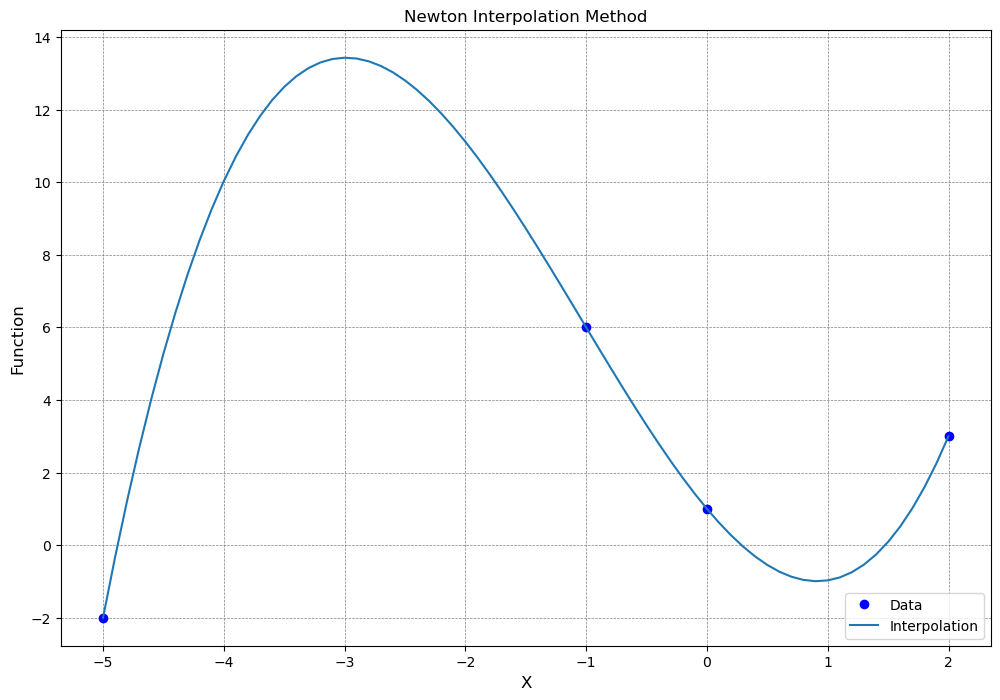

In [42]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])


# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.xlabel('X', fontsize=12)
plt.ylabel('Function', fontsize=12)
plt.title('Newton Interpolation Method')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend(['Data','Interpolation'], loc ="lower right")
